In [8]:

import os
import re
import csv
from math import log2
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

import matplotlib.ticker as tck
import numpy as np
import pandas as pd

asset_folder = '../assets/'

bandwidth = {
    '4Gb/s': 4 * 1024 / 8,
    '4GB/s': 4 * 1024,
    '256.0Mb/s': 256 / 8,
    '256.0MB/s': 256,
    '64.0Mb/s': 64 / 8,
    '64.0MB/s': 64,
}

color_1='#e63946'
color_2='#1d3557'
color_3='#a8dadc'

color_1_1='#8d99ae'
color_1_2='#d90429'

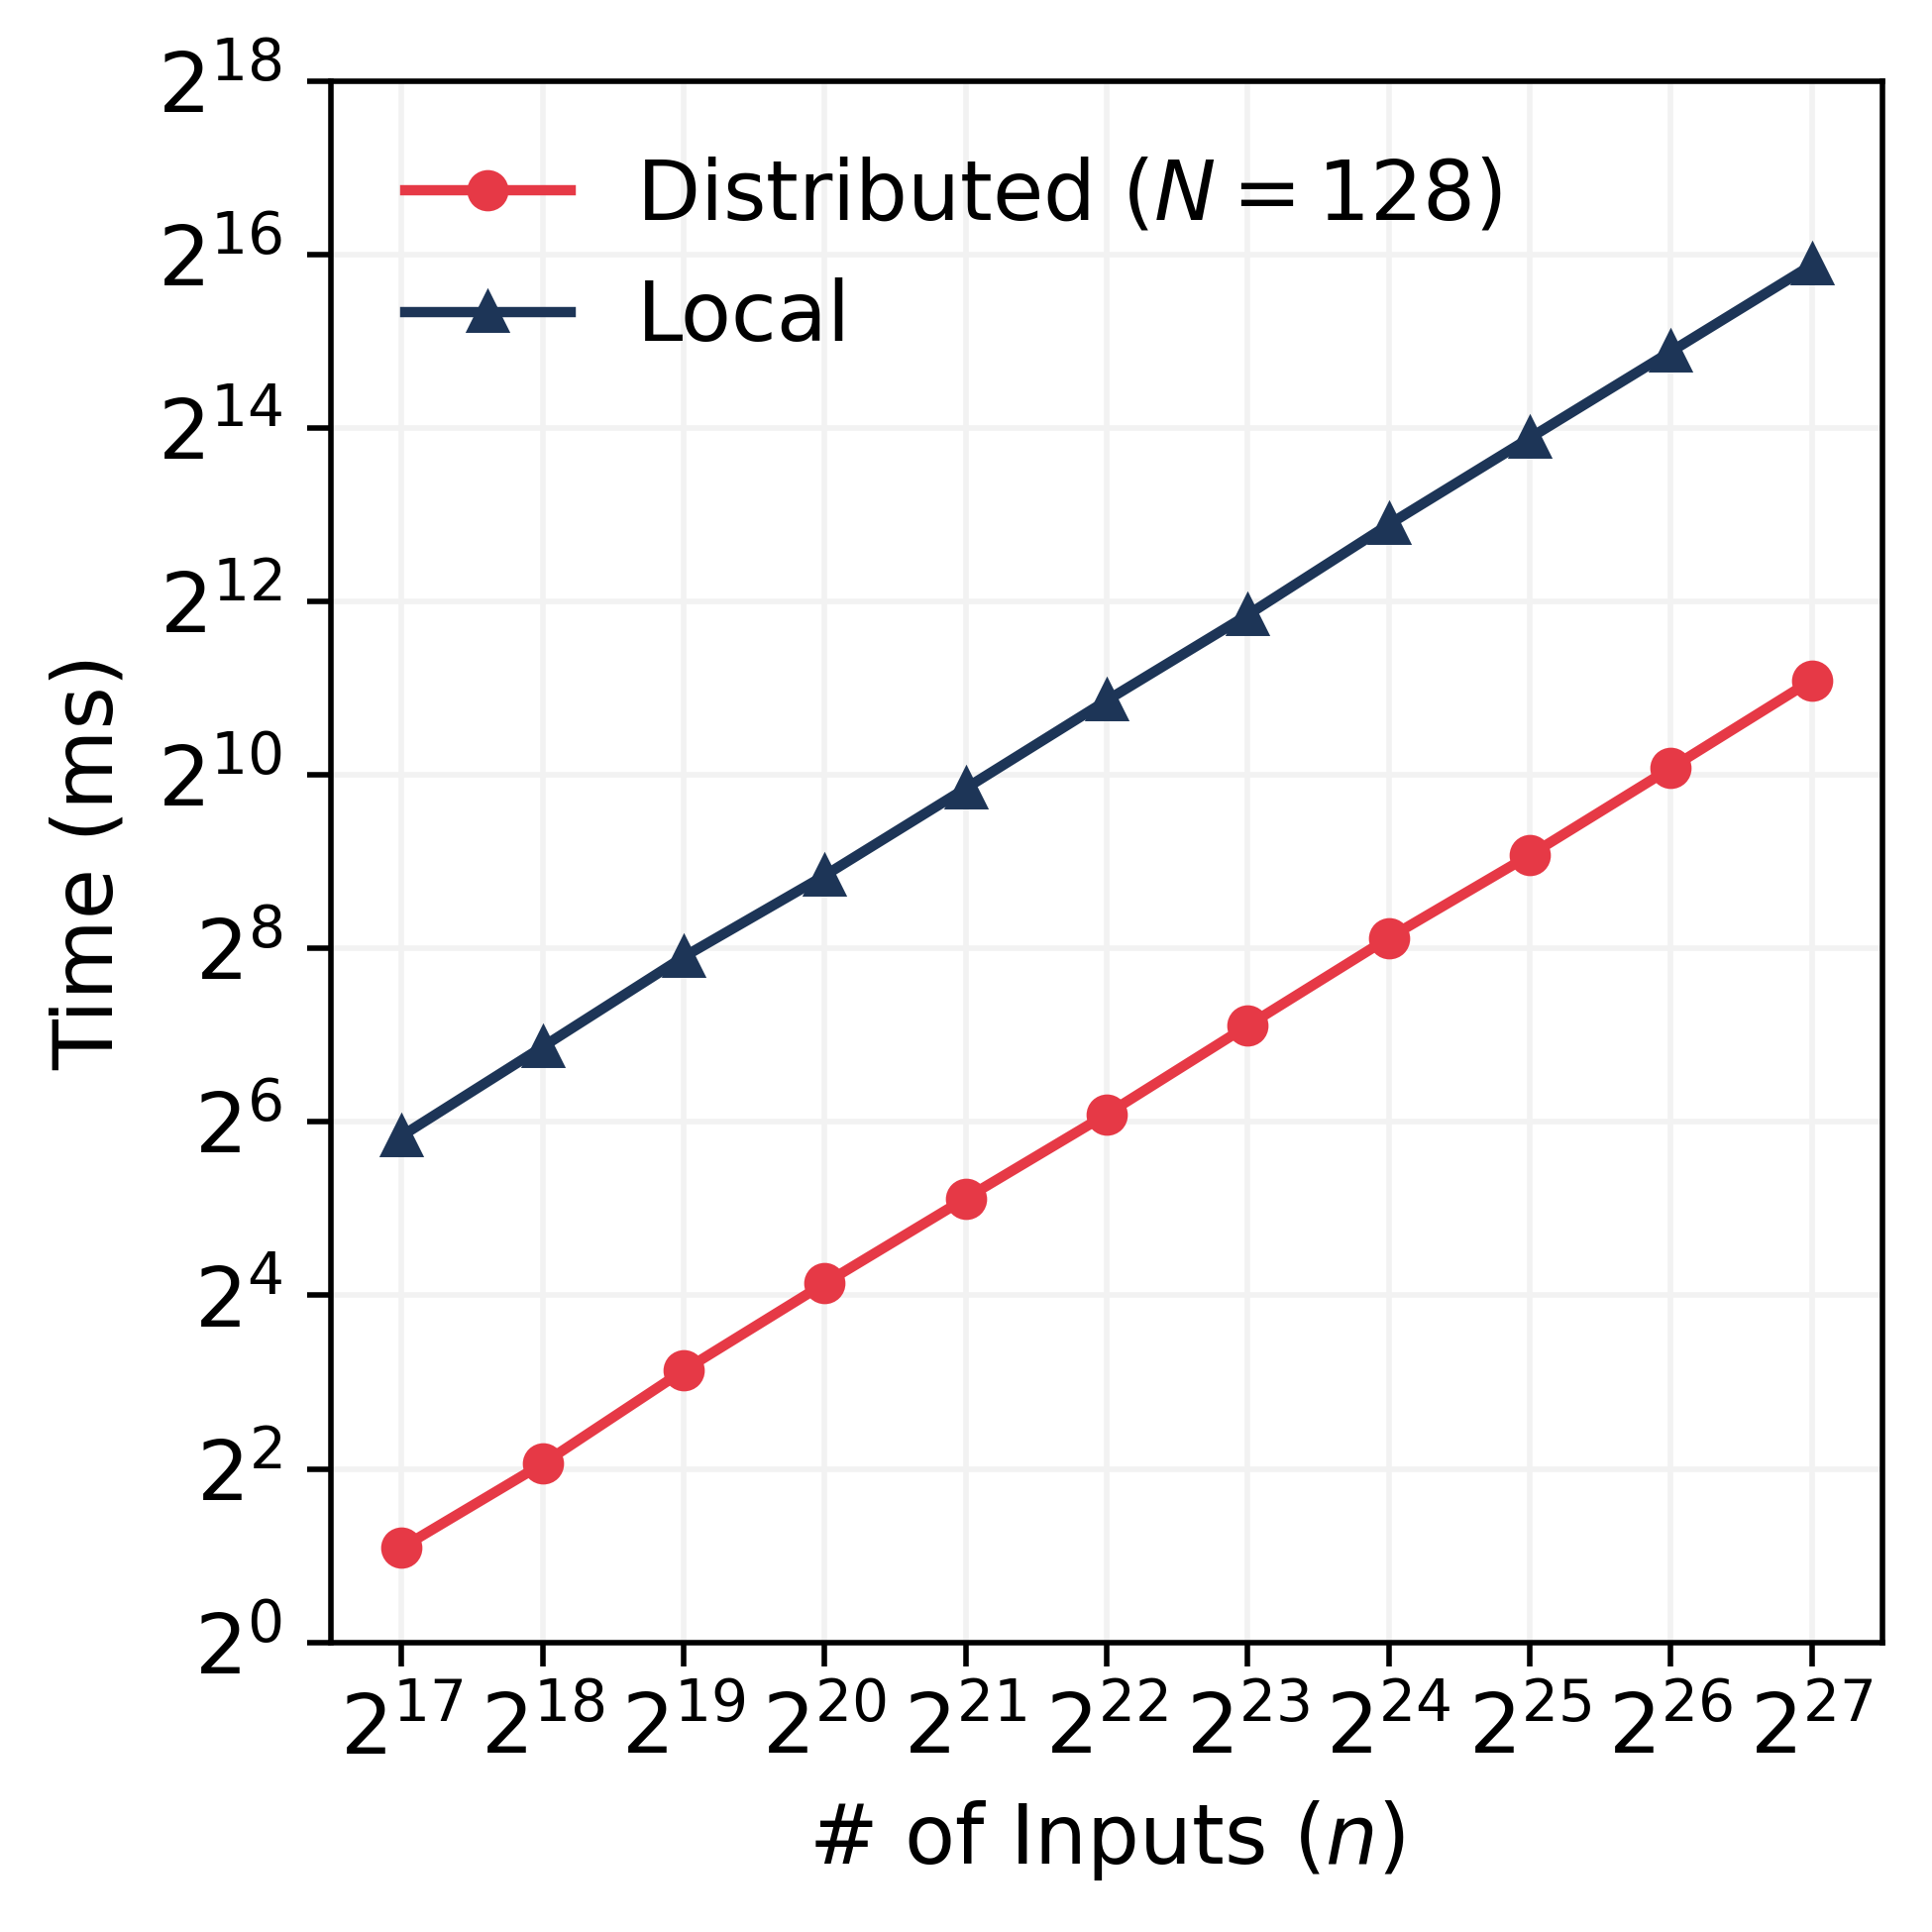

In [9]:
# Sumcheck 
file_path = 'sumcheck.csv'
df = pd.read_csv(file_path)

# Filter
df = df[df['n'].between(17, 27)].sort_values(by='n')

# Prepare the data for plotting
df['n_label'] = ["$2^{"+str(n)+"}$" for n in df['n']]
df['log_d_time'] = df['d_time(ms)'].apply(lambda x: log2(x) if x > 0 else 0)
df['log_l_time'] = df['l_time(ms)'].apply(lambda x: log2(x) if x > 0 else 0)

fig, ax = plt.subplots(figsize=(4,4), dpi=500)

# Plot
plt.plot(df['n_label'], df['log_d_time'], label="Distributed ($N=128$)", marker='o', markersize=5, color=color_1)
plt.plot(df['n_label'], df['log_l_time'], label="Local", marker='^', markersize=5, color=color_2)

# Setting the axis labels and title
major_ytics = np.arange(0, 20, 2)
ax.set_yticks(major_ytics)
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('$2^{%d}$'))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("$\#$ of Inputs $(n)$", fontsize=12)
plt.ylabel("Time (ms)", fontsize=12)

ax.grid(True, color='#F2F2F2')

# Adding legend, grid and making layout tight
plt.legend(fontsize=12, loc='upper left', frameon=False)

# Display the plot
plt.tight_layout()
fig.savefig(f'{asset_folder}sumcheck.pdf', format="pdf") 
plt.show()

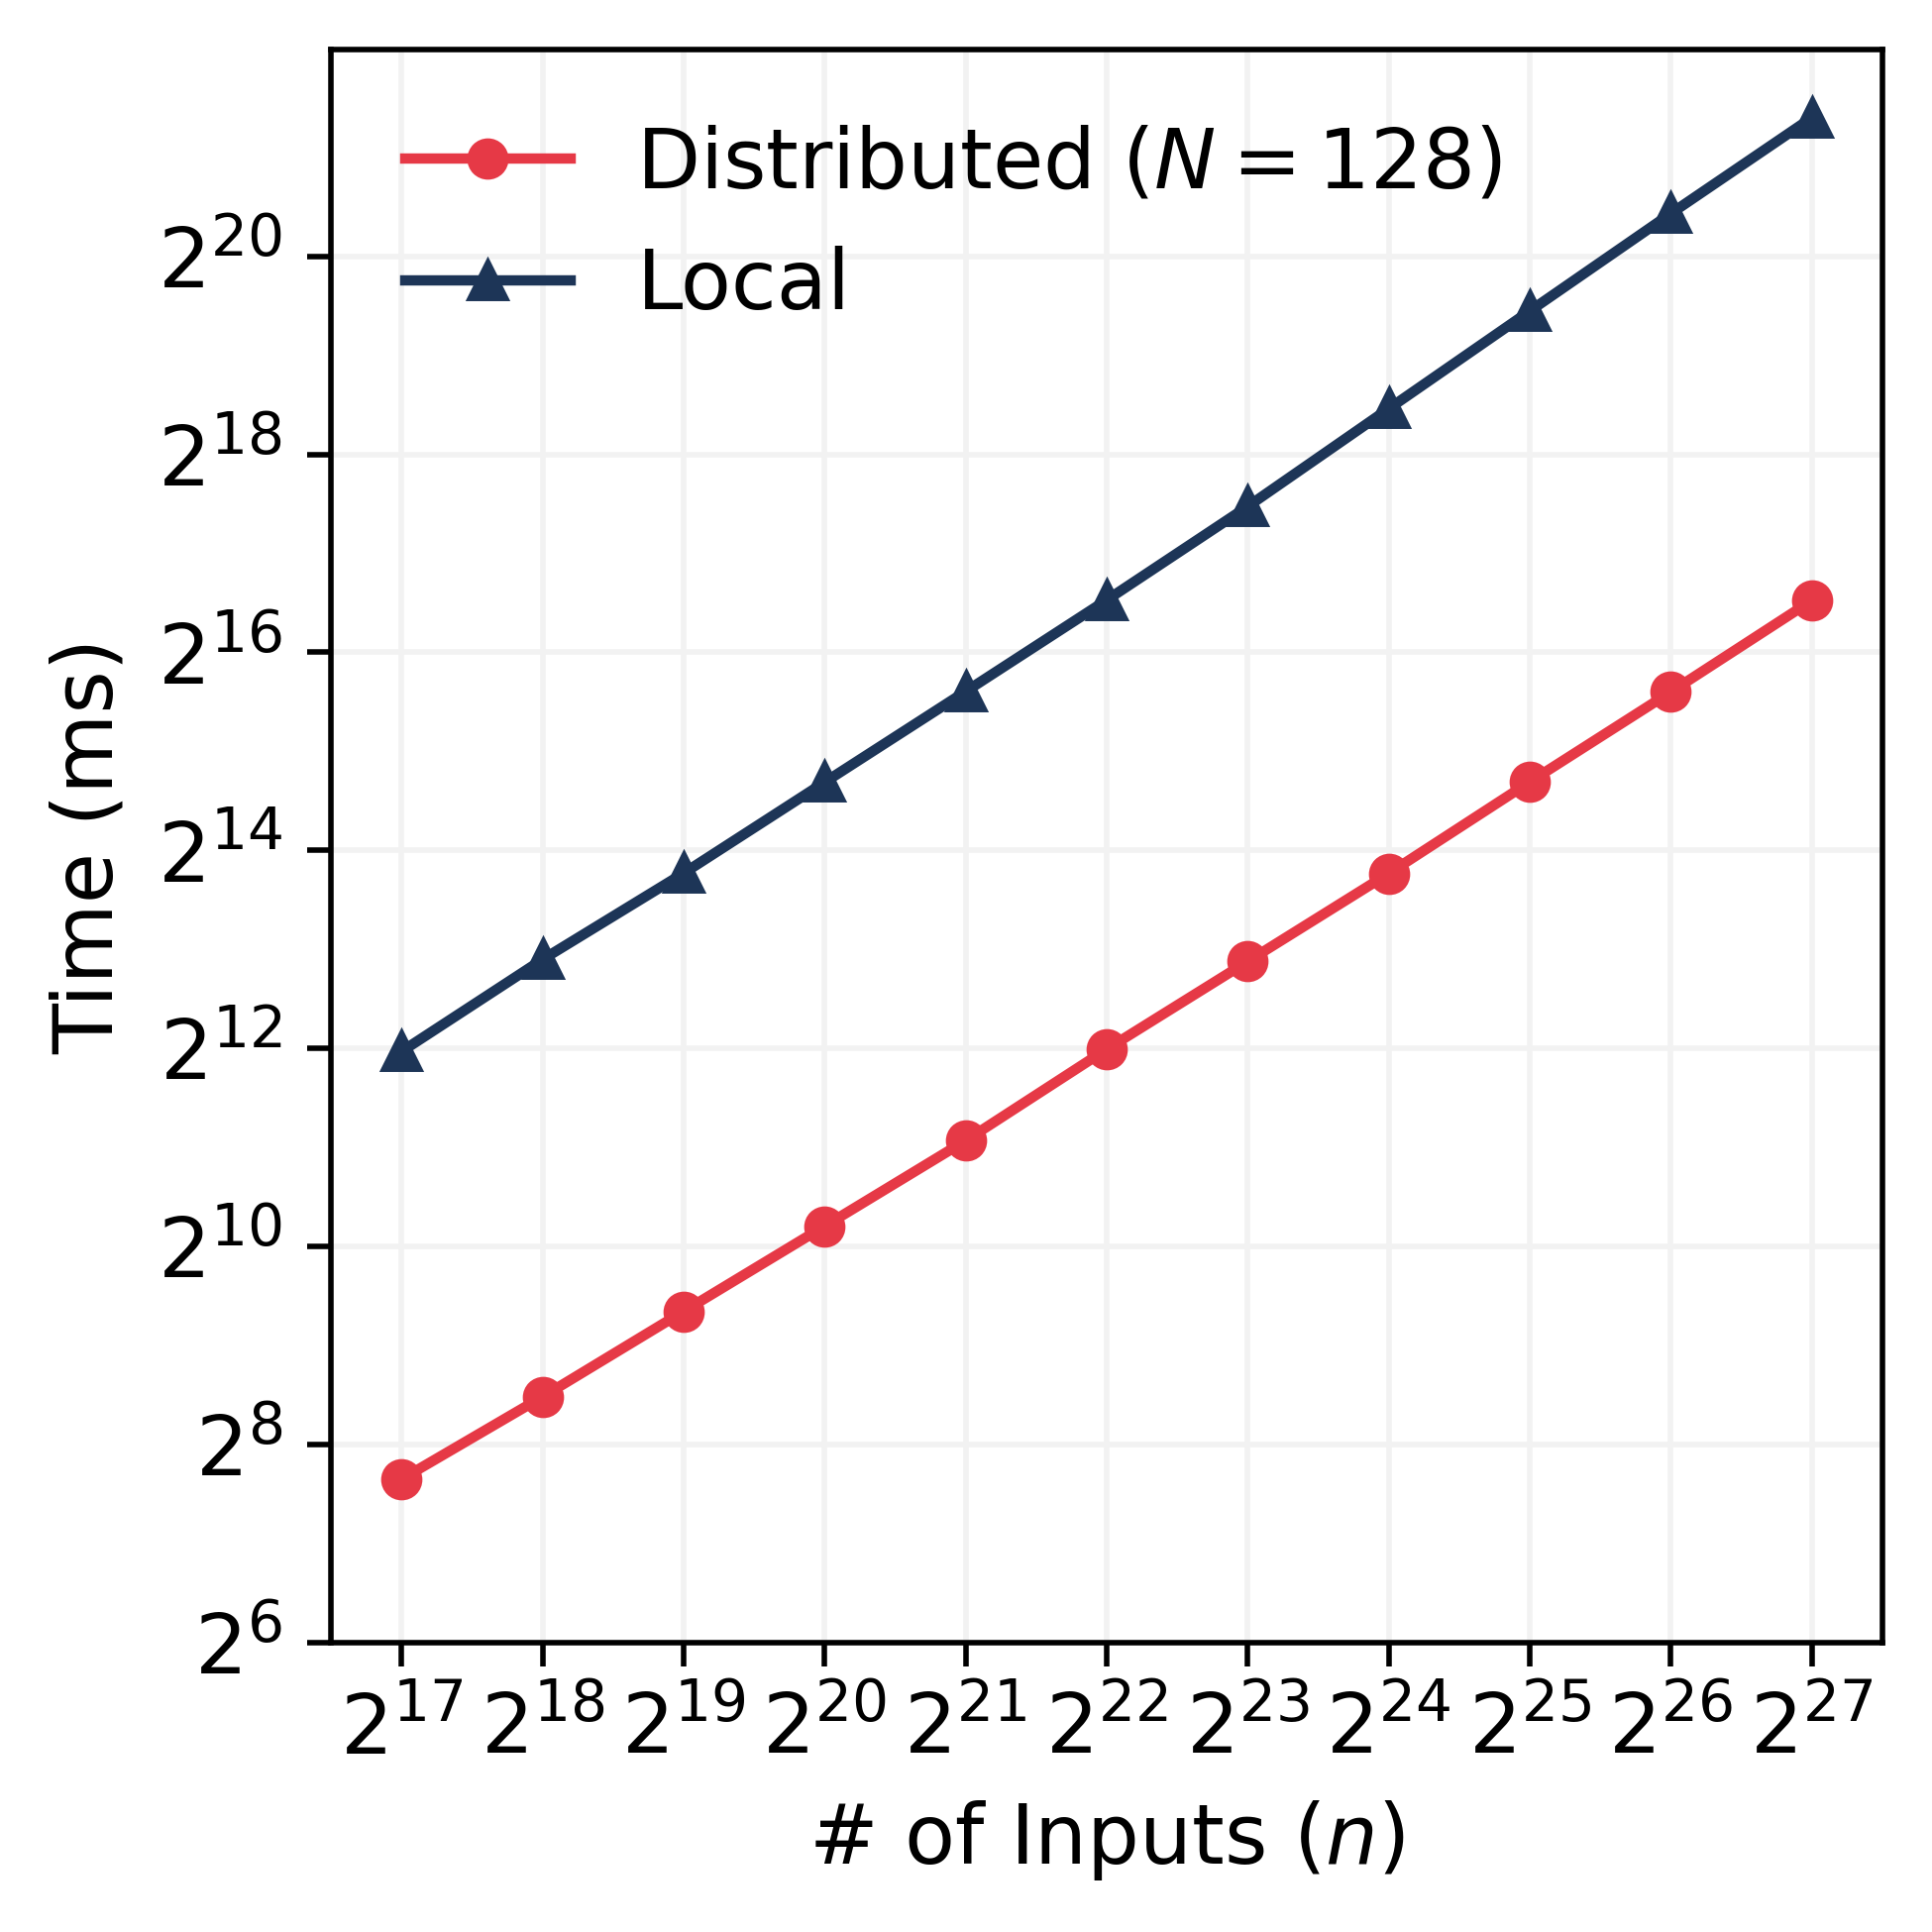

In [10]:

# Polynomial commitment
file_path = 'poly_comm.csv'
df = pd.read_csv(file_path)

# Filter
df = df[df['n'].between(17, 27)].sort_values(by='n')

# Prepare the data for plotting
df['n_label'] = ["$2^{"+str(n)+"}$" for n in df['n']]
df['log_d_time'] = df['d_time(ms)'].apply(lambda x: log2(x) if x > 0 else 0)
df['log_l_time'] = df['l_time(ms)'].apply(lambda x: log2(x) if x > 0 else 0)

fig, ax = plt.subplots(figsize=(4,4), dpi=500)

# Plot
plt.plot(df['n_label'], df['log_d_time'], label="Distributed ($N=128$)", marker='o', markersize=5, color=color_1)
plt.plot(df['n_label'], df['log_l_time'], label="Local", marker='^', markersize=5, color=color_2)

# Setting the axis labels and title
major_ytics = np.arange(6, 22, 2)
ax.set_yticks(major_ytics)
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('$2^{%d}$'))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("$\#$ of Inputs $(n)$", fontsize=12)
plt.ylabel("Time (ms)", fontsize=12)

ax.grid(True, color='#F2F2F2')

# Adding legend, grid and making layout tight
plt.legend(fontsize=12, loc='upper left', frameon=False)
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')

# Display the plot
plt.tight_layout()
fig.savefig(f'{asset_folder}poly_comm.pdf', format="pdf") 
plt.show()

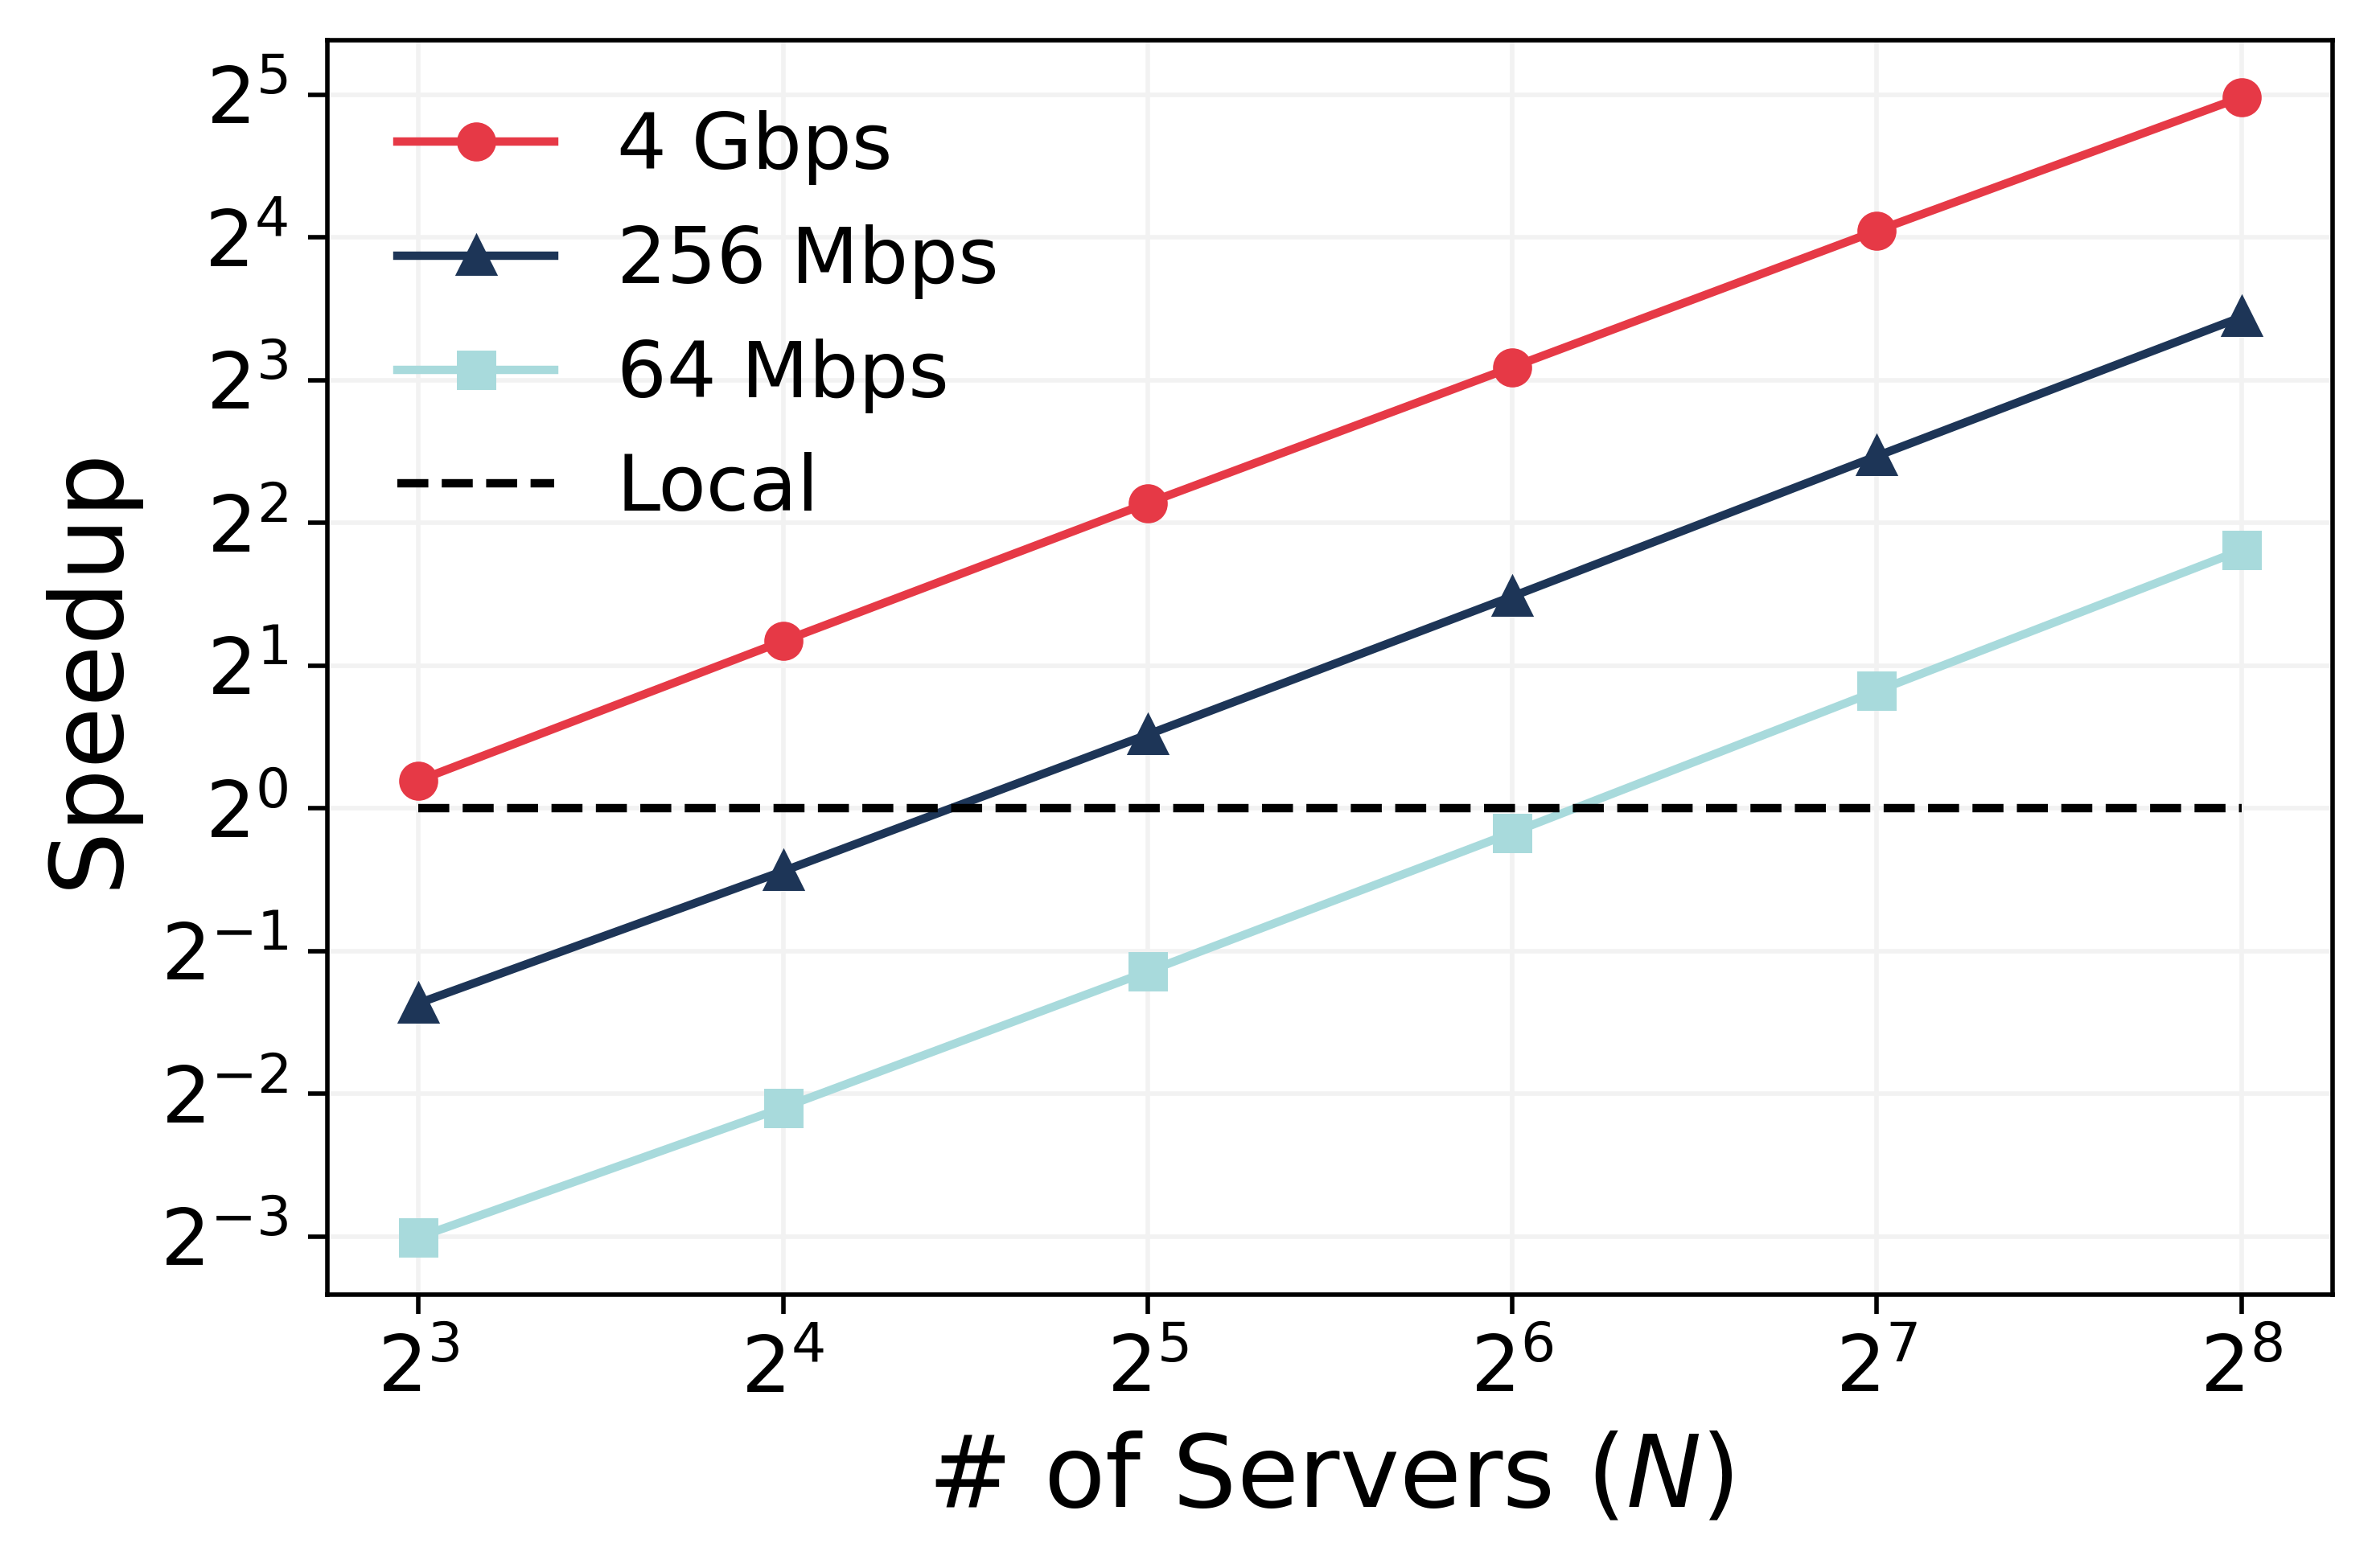

In [11]:
# d_gkr_parties

# Read .csv
file_path = 'd_gkr_parties.csv'
df = pd.read_csv(file_path)

# local GKR n = 19, d = 16
l_gkr = pd.read_csv('l_gkr_depth_16.csv')
local_time = l_gkr[l_gkr['n'] == 19]['l_time(ms)'].iloc[0] # in milliseconds

# Filter
df = df.sort_values(by='parties')

# Prepare the data for plotting
df['parties'] = df['parties'].apply(lambda x: log2(x) if x > 0 else 0)
# Calculate the corrected time for each bandwidth
df['d_time_4GB'] = df.apply(lambda row: row['d_time(ms)'] + row['d_comm(MB)'] / bandwidth['4GB/s'] * 1024, axis=1)
df['d_time_256MB'] = df.apply(lambda row: row['d_time(ms)'] + row['d_comm(MB)'] / bandwidth['256.0MB/s'] * 1024, axis=1)
df['d_time_64MB'] = df.apply(lambda row: row['d_time(ms)'] + row['d_comm(MB)'] / bandwidth['64.0MB/s'] * 1024, axis=1)
df['d_time_4Gb'] = df.apply(lambda row: row['d_time(ms)'] + row['d_comm(MB)'] / bandwidth['4Gb/s'] * 1024, axis=1)
df['d_time_256Mb'] = df.apply(lambda row: row['d_time(ms)'] + row['d_comm(MB)'] / bandwidth['256.0Mb/s'] * 1024, axis=1)
df['d_time_64Mb'] = df.apply(lambda row: row['d_time(ms)'] + row['d_comm(MB)'] / bandwidth['64.0Mb/s'] * 1024, axis=1)

# Calculate speed up (in log2 scale) compared to local time for each bandwidth
df['speed_up_4GB'] = df['d_time_4GB'].apply(lambda x: log2(local_time / x) if x > 0 else 0)
df['speed_up_256MB'] = df['d_time_256MB'].apply(lambda x: log2(local_time / x) if x > 0 else 0)
df['speed_up_64MB'] = df['d_time_64MB'].apply(lambda x: log2(local_time / x) if x > 0 else 0)
df['speed_up_4Gb'] = df['d_time_4Gb'].apply(lambda x: log2(local_time / x) if x > 0 else 0)
df['speed_up_256Mb'] = df['d_time_256Mb'].apply(lambda x: log2(local_time / x) if x > 0 else 0)
df['speed_up_64Mb'] = df['d_time_64Mb'].apply(lambda x: log2(local_time / x) if x > 0 else 0)

# Plot
fig, ax = plt.subplots(figsize=(6,4), dpi=500)

# plt.plot(df['parties'], df['speed_up_4GB'], label="4 GB/s", marker='o', markersize=6)
# plt.plot(df['parties'], df['speed_up_256MB'], label="256 MB/s", marker='^', markersize=6)
# plt.plot(df['parties'], df['speed_up_64MB'], label="64 MB/s", marker='s', markersize=6)
plt.plot(df['parties'], df['speed_up_4Gb'], label="4 Gbps", marker='o', markersize=6, color=color_1)
plt.plot(df['parties'], df['speed_up_256Mb'], label="256 Mbps", marker='^', markersize=6, color=color_2)
plt.plot(df['parties'], df['speed_up_64Mb'], label="64 Mbps", marker='s', markersize=6, color=color_3)
plt.plot(df['parties'], [0 for _ in df['parties']], label="Local", linestyle="--", color='black')
# plt.plot(df['parties'], [1,2,3,4,5,6], linestyle = "--", color = 'blue', label= "Theoretical Speedup", alpha=0.7)

# Setting the axis labels and title
major_ytics = np.arange(-3, 6, 1)  # Adjust y-axis ticks to show speed up
ax.set_yticks(major_ytics)
major_xtics = np.arange(3, 9, 1)
ax.set_xticks(major_xtics)
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('$2^{%d}$'))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('$2^{%d}$'))
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("$\#$ of Servers $(N)$", fontsize=18)
plt.ylabel("Speedup", fontsize=18)

ax.grid(True, color='#F2F2F2')
plt.legend(fontsize=14, loc='upper left', frameon=False)
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')

# Display the plot
plt.tight_layout()
fig.savefig(f'{asset_folder}d_gkr_parites.pdf', format="pdf") 
plt.show()

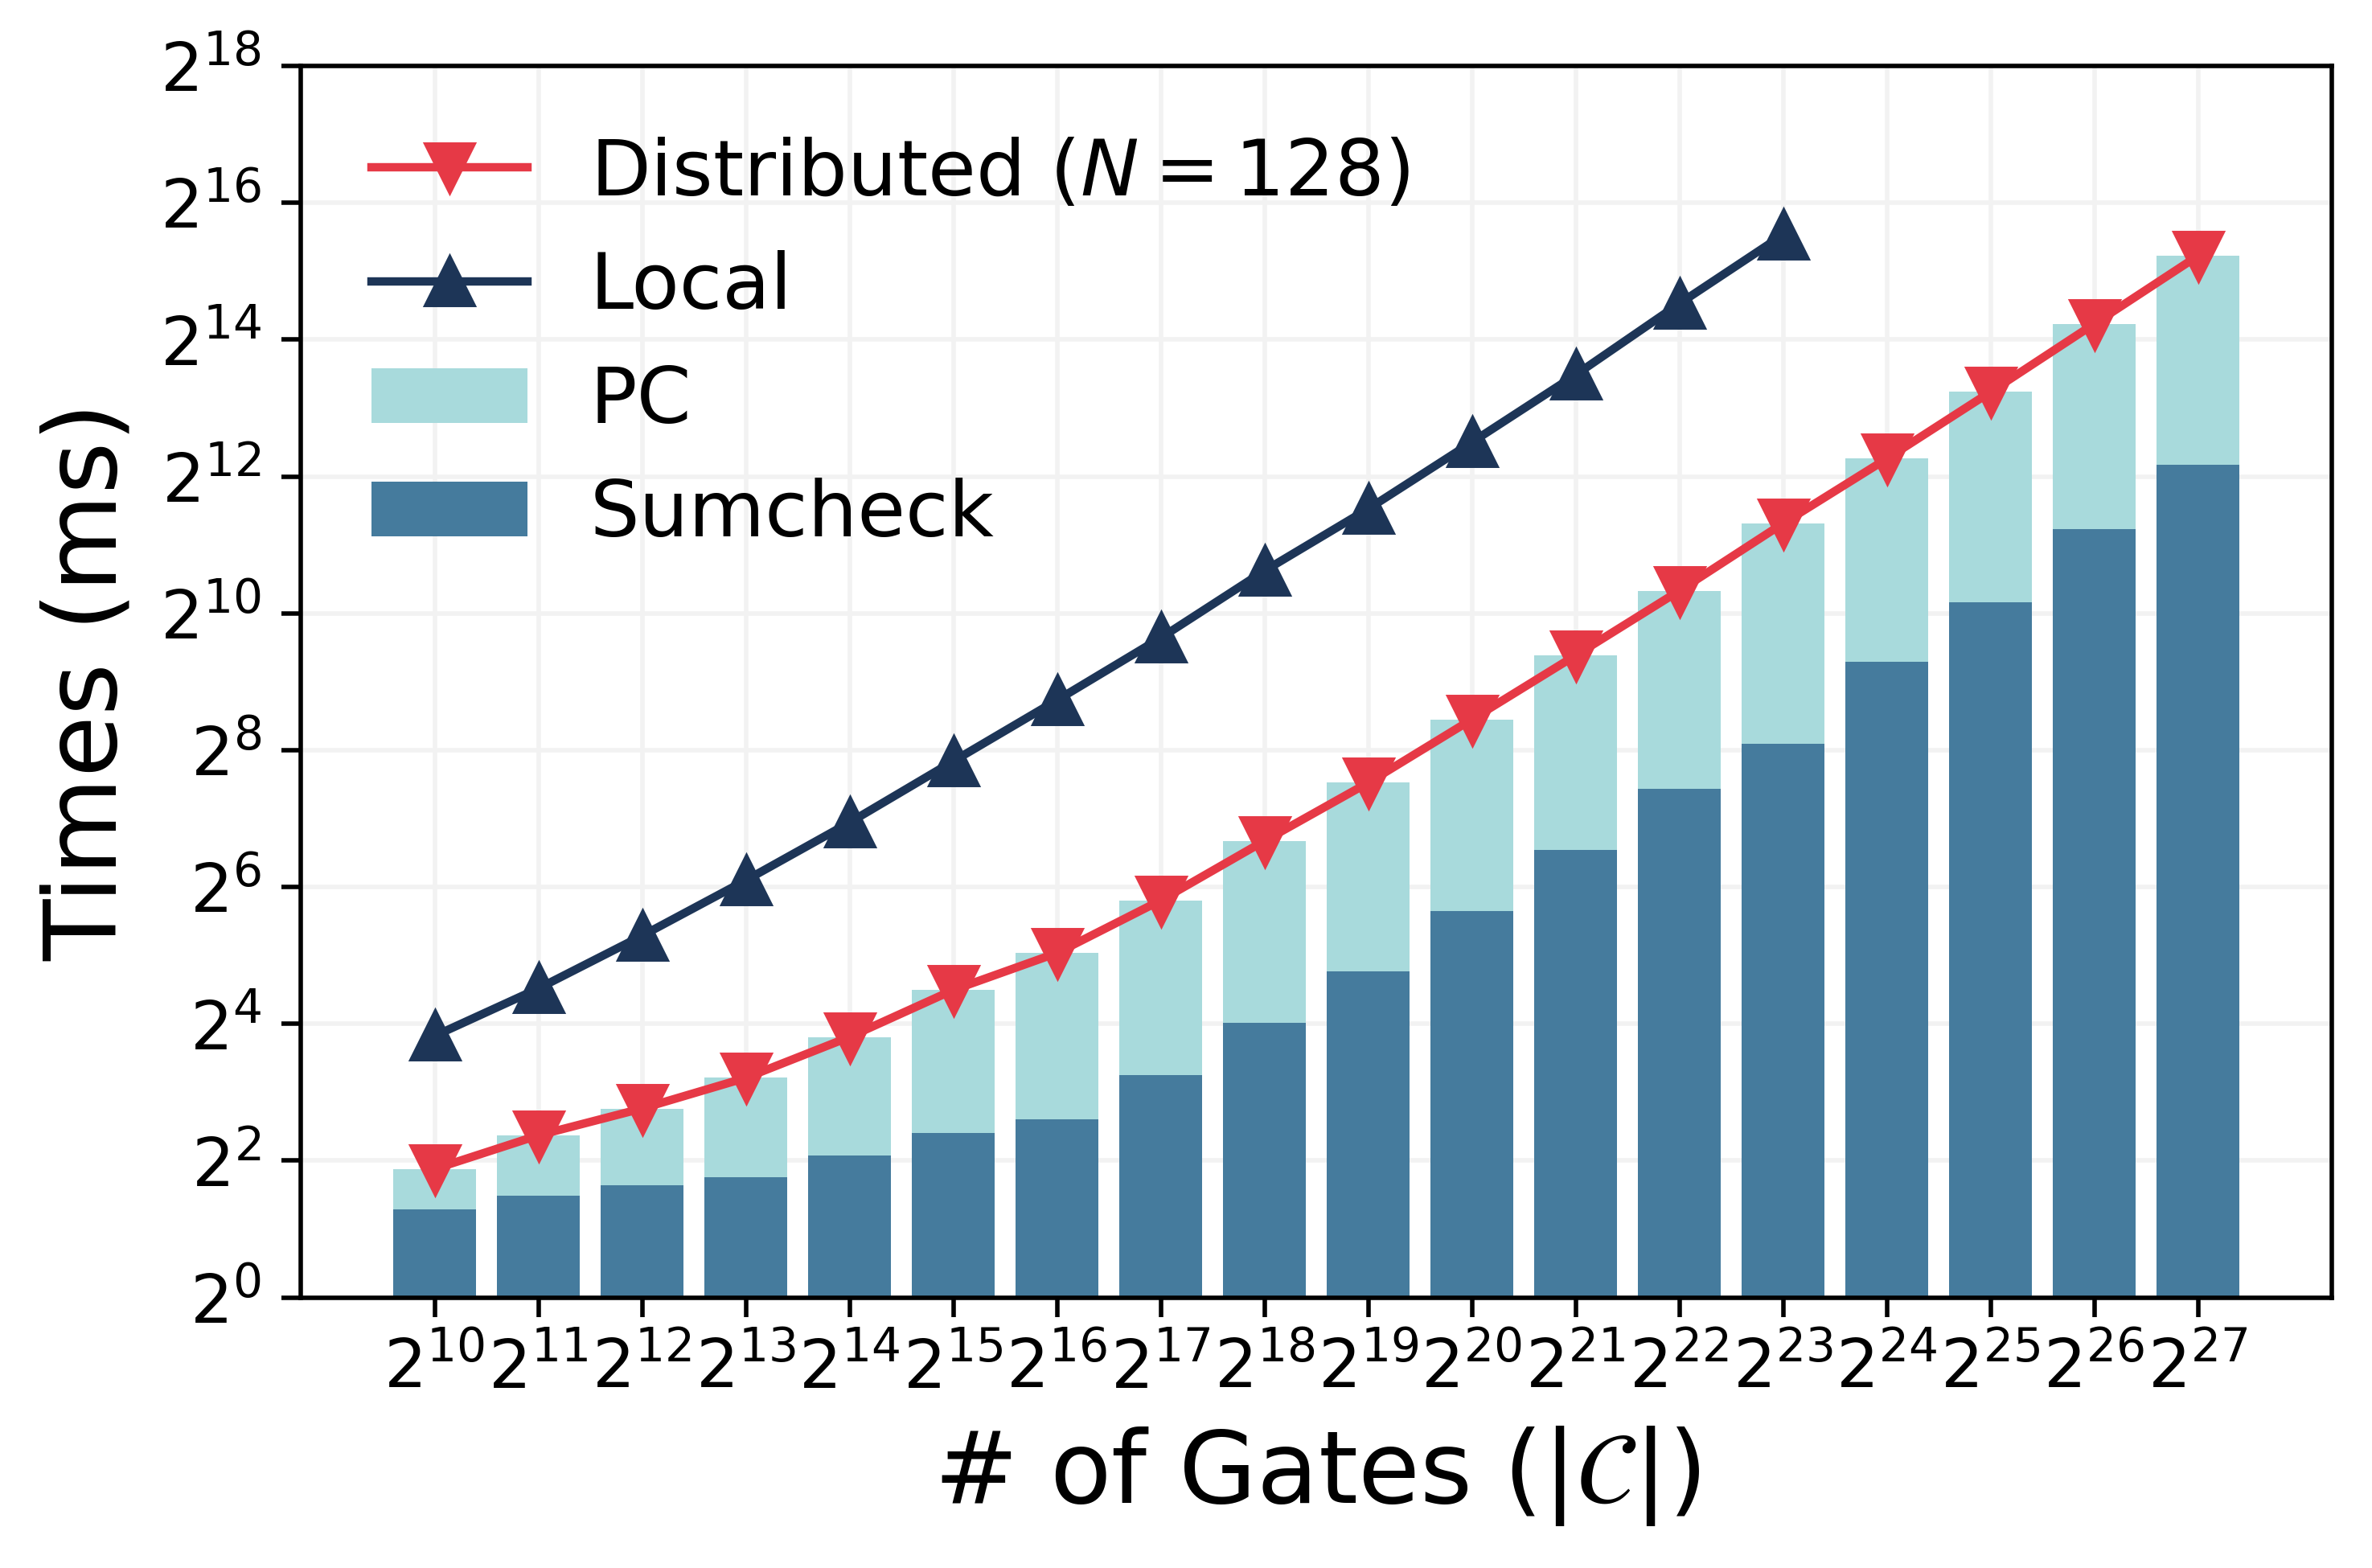

In [12]:
# Breakdown d_gkr depth=2^4=16 N=128
# Comparison with local

# Read .csv
d_gkr = pd.read_csv('d_gkr_depth_16.csv')
l_gkr = pd.read_csv('l_gkr_depth_16.csv')

# Filter
d_gkr = d_gkr[d_gkr['d_time(ms)'] != 0]
d_gkr = d_gkr[d_gkr['n'].between(6,23)].sort_values(by='n')
l_gkr = l_gkr[l_gkr['n'].between(6,19)].sort_values(by='n')

# Prepare the data for plotting
# Adjust 'n' by adding logD (here D=16, so logD=4)
d_gkr['n'] = d_gkr['n'] + 4
l_gkr['n'] = l_gkr['n'] + 4
sizes = d_gkr['n']
d_gkr_time = d_gkr['d_time(ms)']
l_gkr_time = l_gkr['l_time(ms)']
log_d_gkr_time = [log2(x) if x > 0 else 0 for x in d_gkr_time]
log_l_gkr_time = [log2(x) if x > 0 else 0 for x in l_gkr_time]

# Calculate the breakdown components
sumcheck = d_gkr['sumcheck']
poly_comm = d_gkr['poly_comm']
sumcheck_frac = [sumcheck.iloc[i] / d_gkr_time.iloc[i] * log_d_gkr_time[i] for i in range(len(sizes))]
poly_comm_frac = [poly_comm.iloc[i] / d_gkr_time.iloc[i] * log_d_gkr_time[i] for i in range(len(sizes))]

# Plot
fig, ax = plt.subplots(figsize=(6,4), dpi=500)

# Labels for the x-axis
size_label = ["$2^{" + str(x) + "}$" for x in d_gkr['n']]

plt.plot(size_label, log_d_gkr_time, label="Distributed ($N=128$)", marker='v', markersize=8, color=color_1)
plt.plot(size_label[:len(size_label)-4], log_l_gkr_time, label="Local", marker='^', markersize=8, color=color_2)
plt.bar(size_label, poly_comm_frac, bottom=sumcheck_frac, label="PC", color='#a8dadc', alpha=1)
plt.bar(size_label, sumcheck_frac, label="Sumcheck", color='#457b9d', alpha=1)

major_ytics = np.arange(0, 20, 2)
ax.set_yticks(major_ytics)
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('$2^{%d}$'))
ax.tick_params(axis='both', which='major', labelsize=12)

# Adding legend, grid and making layout tight
plt.xlabel("$\#$ of Gates $(|\mathcal{C}|)$", fontsize=18)
plt.ylabel("Times (ms)", fontsize=18)

ax.set_axisbelow(True)
ax.grid(True, color='#F2F2F2')

plt.legend(fontsize=14, loc='upper left', frameon=False)
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')

# Display the plot
plt.tight_layout()
fig.savefig(f'{asset_folder}d_gkr_breakdown.pdf', format="pdf") 
plt.show()

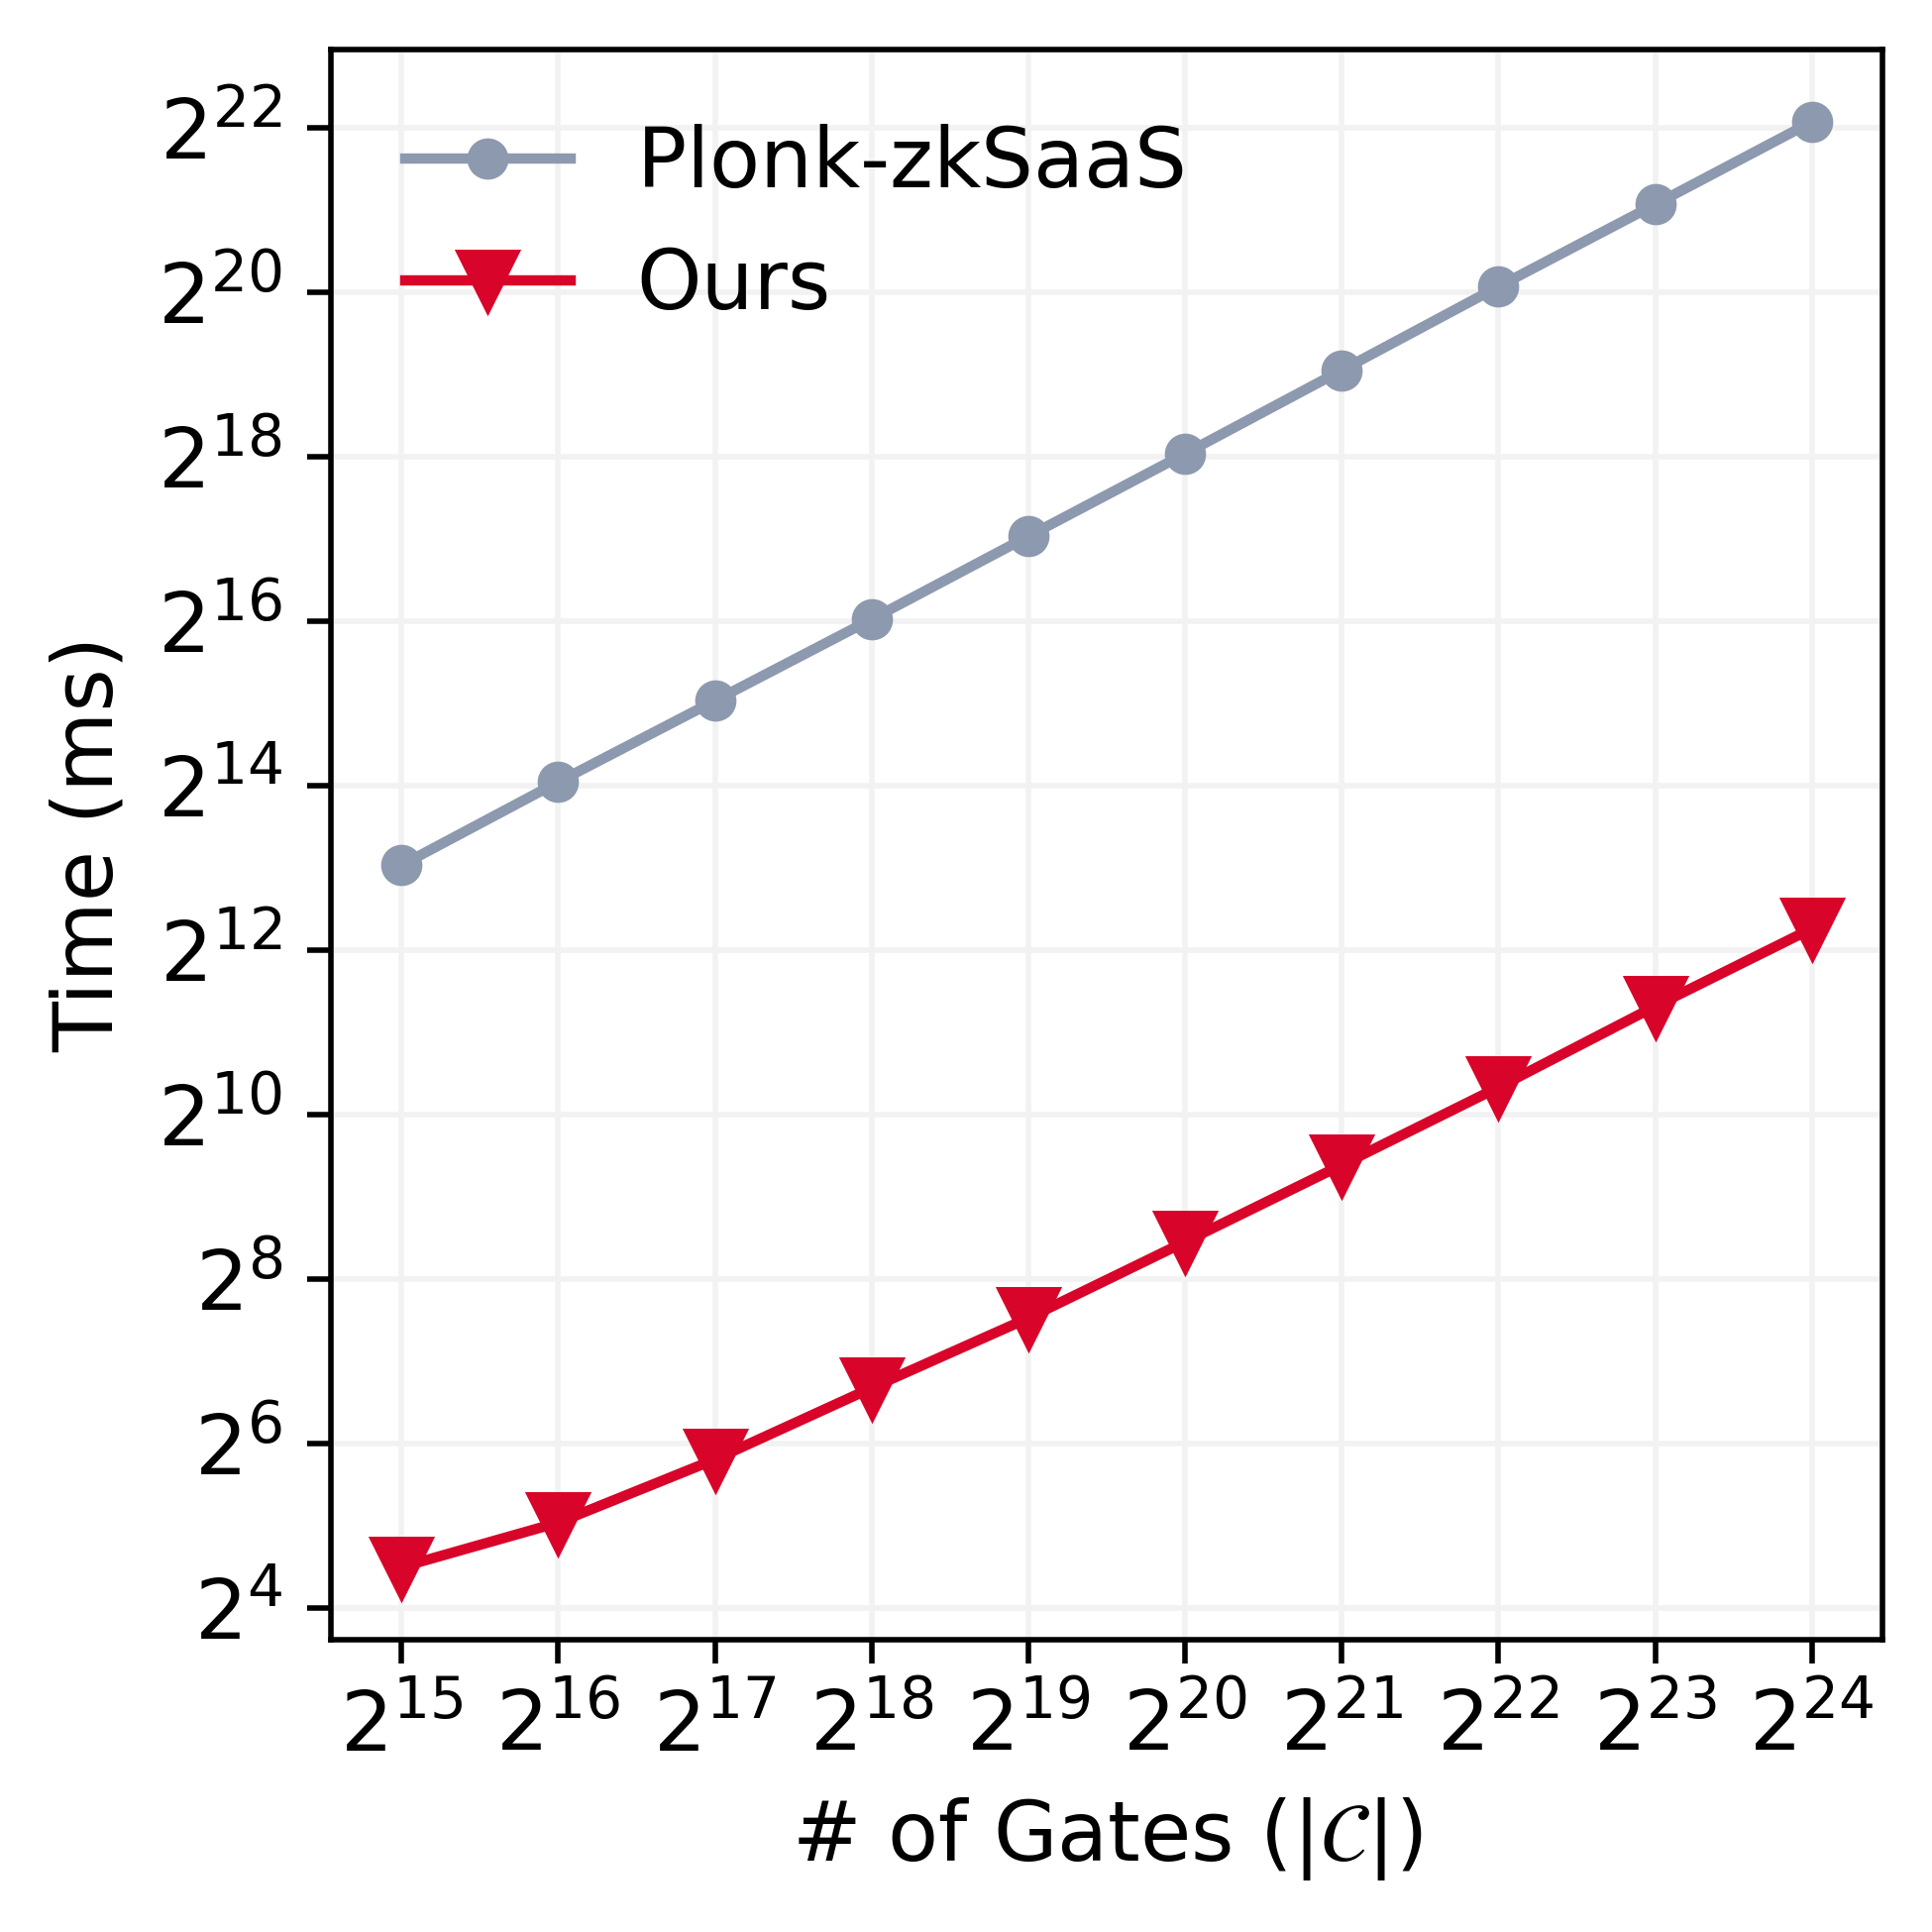

In [13]:

# Time comparison with dPlonk 
# Depth=2^4=16 N=128

# Read .csv
d_gkr = pd.read_csv('d_gkr_depth_16.csv')
d_plonk = pd.read_csv('d_plonk.csv')

# Filter
d_gkr = d_gkr[d_gkr['d_time(ms)'] != 0]
d_gkr = d_gkr[d_gkr['n'].between(11,20)].sort_values(by='n')
d_plonk = d_plonk[d_plonk['n'].between(15,24)].sort_values(by='n')

# Prepare the data for plotting
# Adjust 'n' by adding logD (here D=16, so logD=4)
d_gkr['n'] = d_gkr['n'] + 4
sizes = d_gkr['n']
d_gkr_time = d_gkr['d_time(ms)']
d_plonk_time = d_plonk['d_time(ms)']
log_d_gkr_time = [log2(x) if x > 0 else 0 for x in d_gkr_time]
log_d_plonk_time = [log2(x) if x > 0 else 0 for x in d_plonk_time]

# Plot
fig, ax = plt.subplots(figsize=(4,4), dpi=500)

# Labels for the x-axis
size_label = ["$2^{" + str(x) + "}$" for x in d_gkr['n']]

plt.plot(size_label, log_d_plonk_time, label="$\mathsf{Plonk}$-$\mathsf{zkSaaS}$", marker='o', markersize=5, color=color_1_1)
plt.plot(size_label, log_d_gkr_time, label="Ours", marker='v', markersize=8, color=color_1_2)

major_ytics = np.arange(4, 24, 2)
ax.set_yticks(major_ytics)
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('$2^{%d}$'))
ax.tick_params(axis='both', which='major', labelsize=12)

# Adding legend, grid and making layout tight
plt.xlabel("$\#$ of Gates $(|\mathcal{C}|)$", fontsize=12)
plt.ylabel("Time (ms)", fontsize=12)

ax.grid(True, color='#F2F2F2')

plt.legend(fontsize=12, loc='upper left', frameon=False)
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')

# Display the plot
plt.tight_layout()
fig.savefig(f'{asset_folder}d_gkr_comparison_time.pdf', format="pdf") 
plt.show()

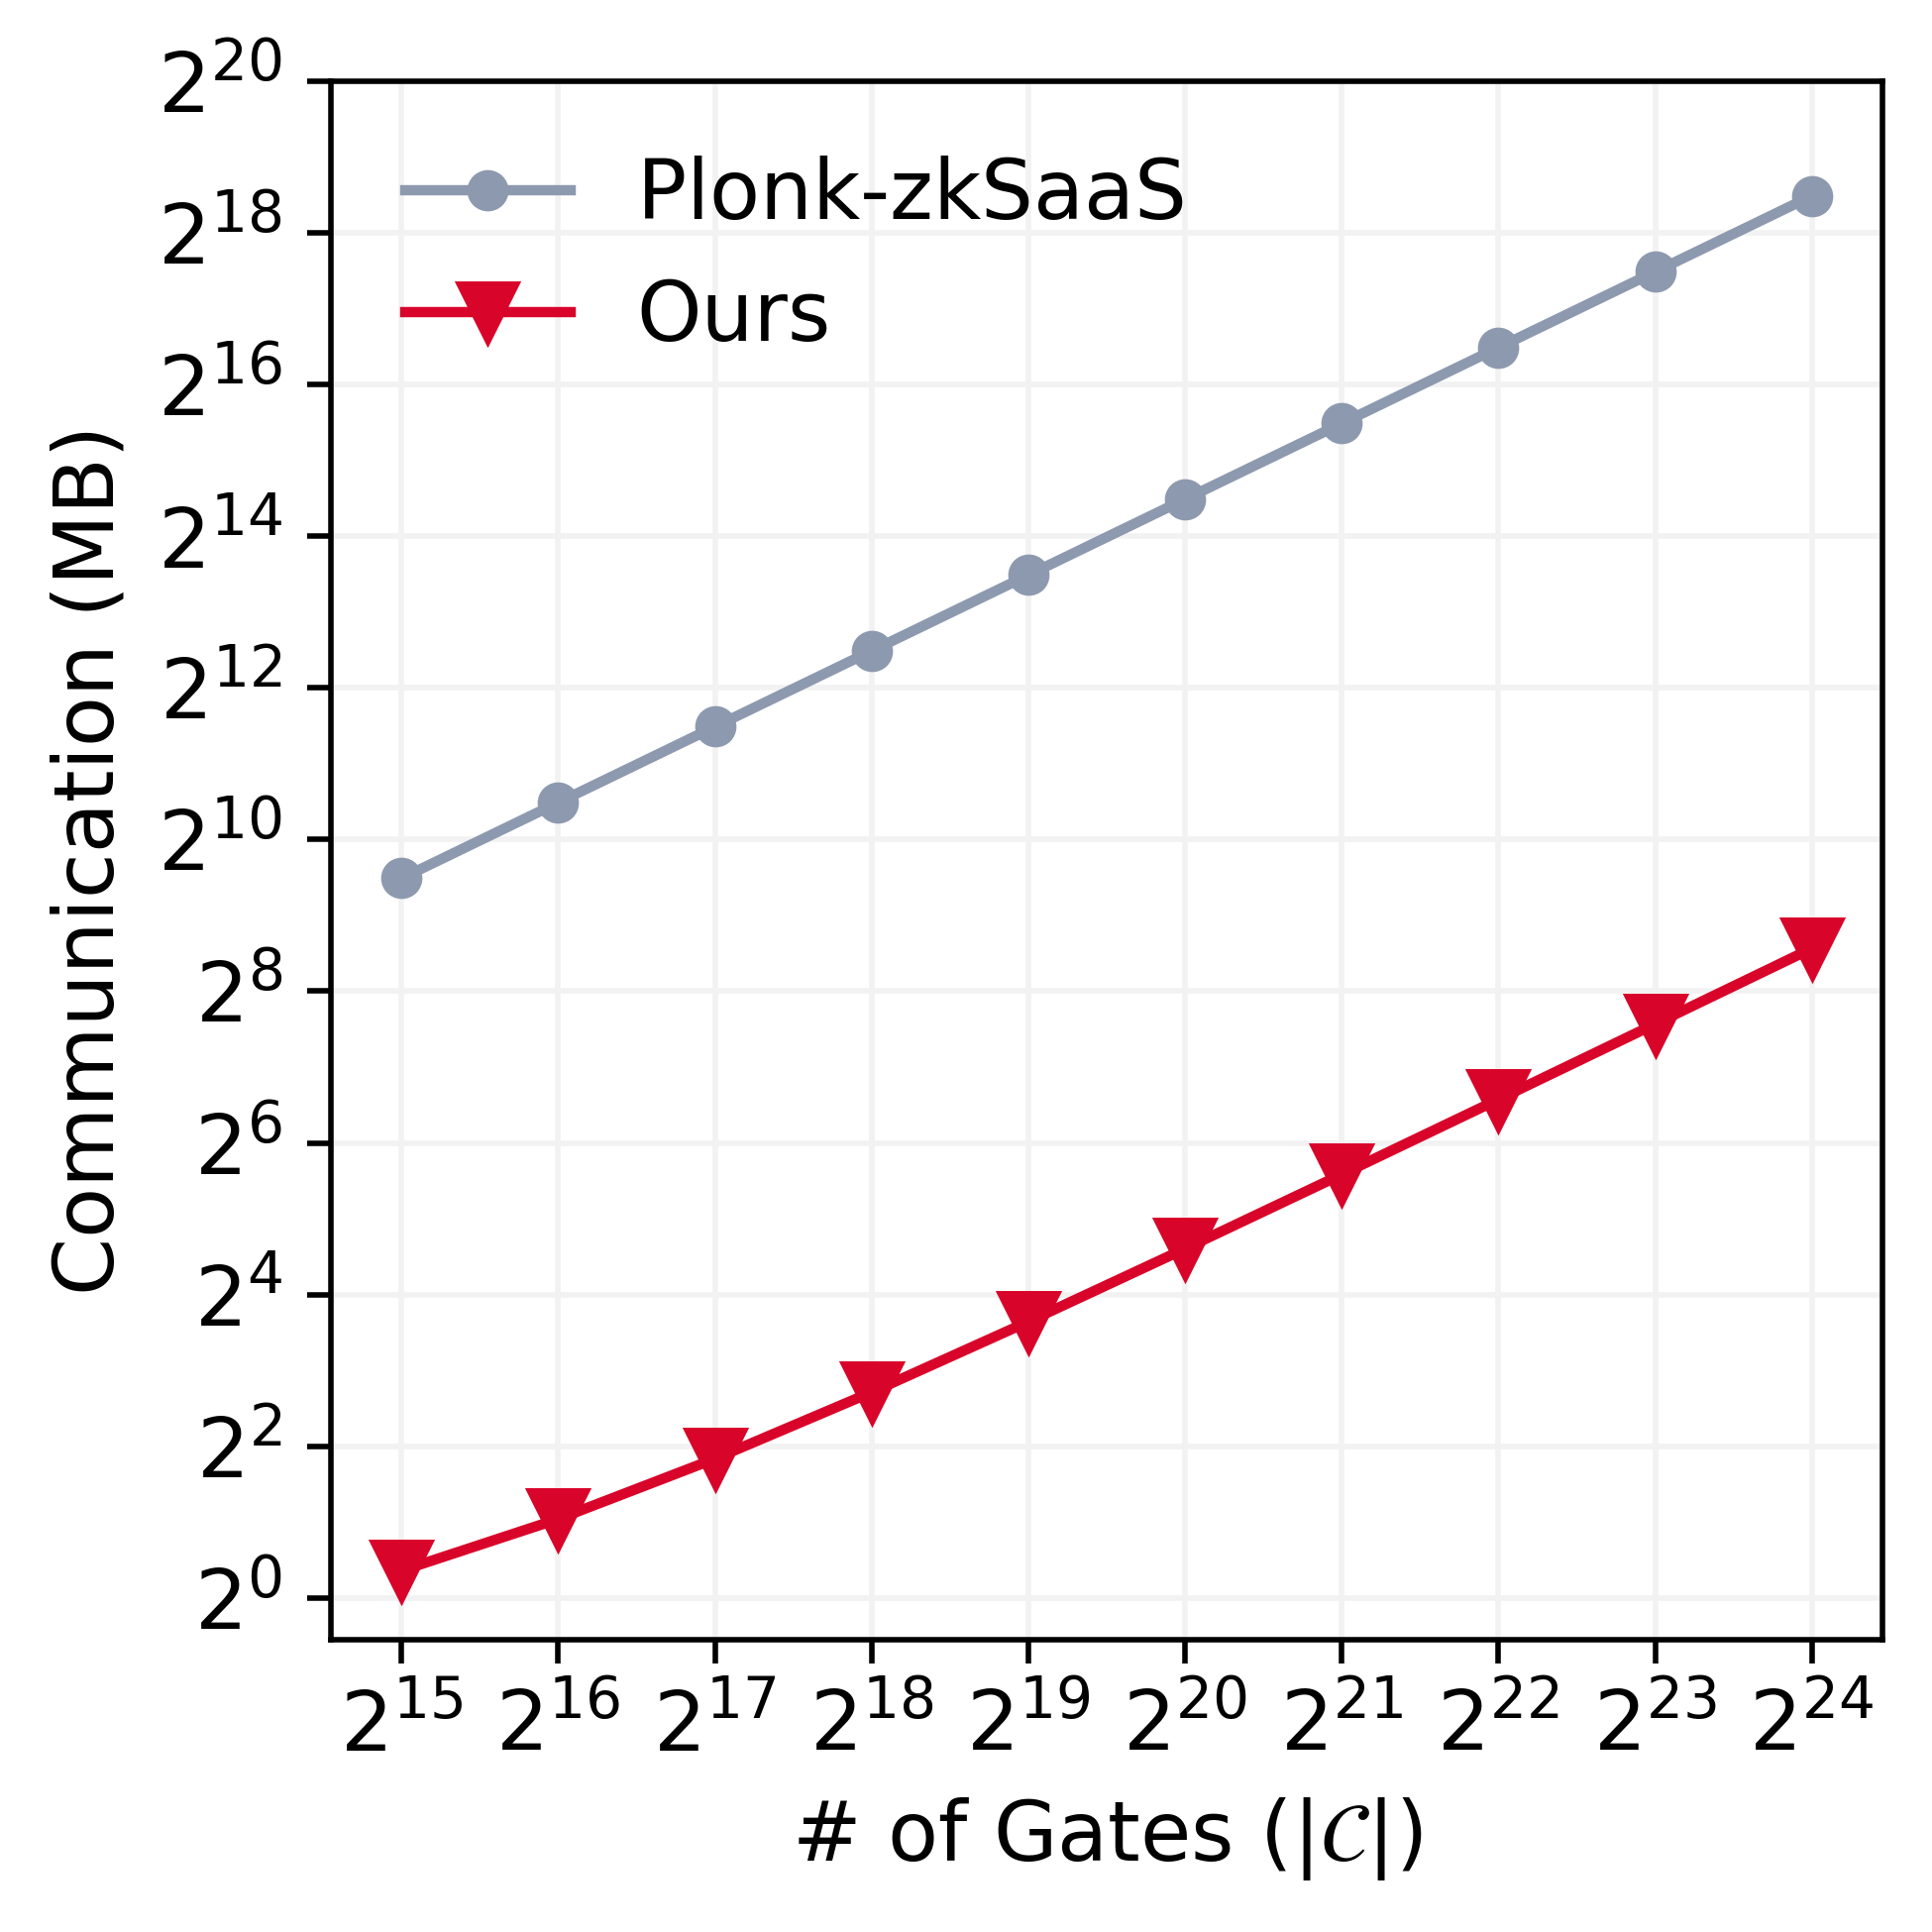

In [14]:

# Communication comparison with dPlonk 
# Depth=2^4=16 N=128

# Read .csv
d_gkr = pd.read_csv('d_gkr_depth_16.csv')
d_plonk = pd.read_csv('d_plonk.csv')

# Filter
d_gkr = d_gkr[d_gkr['d_comm(MB)'] != 0]
d_gkr = d_gkr[d_gkr['n'].between(11,20)].sort_values(by='n')
d_plonk = d_plonk[d_plonk['n'].between(15,24)].sort_values(by='n')

# Prepare the data for plotting
# Adjust 'n' by adding logD (here D=16, so logD=4)
d_gkr['n'] = d_gkr['n'] + 4
sizes = d_gkr['n']
d_gkr_comm = d_gkr['d_comm(MB)']
d_plonk_comm = d_plonk['d_comm(MB)']
log_d_gkr_comm = [log2(x) if x > 0 else 0 for x in d_gkr_comm]
log_d_plonk_comm = [log2(x) if x > 0 else 0 for x in d_plonk_comm]

# Plot
fig, ax = plt.subplots(figsize=(4,4), dpi=500)

# Labels for the x-axis
size_label = ["$2^{" + str(x) + "}$" for x in d_gkr['n']]

plt.plot(size_label, log_d_plonk_comm, label="$\mathsf{Plonk}$-$\mathsf{zkSaaS}$", marker='o', markersize=5, color=color_1_1)
plt.plot(size_label, log_d_gkr_comm, label="Ours", marker='v', markersize=8, color=color_1_2)

major_ytics = np.arange(0, 22, 2)
ax.set_yticks(major_ytics)
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('$2^{%d}$'))
ax.tick_params(axis='both', which='major', labelsize=12)

# Adding legend, grid and making layout tight
plt.xlabel("$\#$ of Gates $(|\mathcal{C}|)$", fontsize=12)
plt.ylabel("Communication (MB)", fontsize=12)

ax.grid(True, color='#F2F2F2')

plt.legend(fontsize=12, loc='upper left', frameon=False)
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')

# Display the plot
plt.tight_layout()
fig.savefig(f'{asset_folder}d_gkr_comparison_comm.pdf', format="pdf") 
plt.show()